In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 - Data exploration

### Import and load the data

In [7]:
df = pd.read_csv("C:/Negin-Centennial-apps/Data Warehouse-309/Project2/Bicycle_Thefts.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
df.head()

,X,Y,OBJECTID,event_unique_id,Primary_Offence,Occurrence_Date,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,Occurrence_DayOfMonth,...,Bike_Make,Bike_Model,Bike_Type,Bike_Speed,Bike_Colour,Cost_of_Bike,Status,Longitude,Latitude,ObjectId2
0,-8.850630e+06,5.411196e+06,17744,GO-20179016397,THEFT UNDER,2017/10/03 04:00:00+00,2017,October,Tuesday,3,...,GI,ESCAPE 2,OT,7,BLK,700.0,STOLEN,-79.506560,43.648427,1
1,-8.850439e+06,5.412149e+06,17759,GO-20172033056,THEFT UNDER - BICYCLE,2017/11/08 05:00:00+00,2017,November,Wednesday,8,...,UNKNOWN MAKE,NaN,TO,1,BLK,1100.0,RECOVERED,-79.504849,43.654623,2
2,-8.851203e+06,5.411169e+06,17906,GO-20189030822,THEFT UNDER - BICYCLE,2018/09/14 04:00:00+00,2018,September,Friday,14,...,OT,CROSSTRAIL,MT,24,BLK,904.0,STOLEN,-79.511709,43.648253,3
3,-8.851203e+06,5.411169e+06,17962,GO-2015804467,THEFT UNDER,2015/05/07 04:00:00+00,2015,May,Thursday,7,...,GT,NaN,TO,10,BLKDGR,400.0,STOLEN,-79.511709,43.648253,4
4,-8.851160e+06,5.411032e+06,17963,GO-20159002781,THEFT UNDER,2015/05/16 04:00:00+00,2015,May,Saturday,16,...,GI,NaN,MT,6,RED,600.0,STOLEN,-79.511327,43.647364,5


### Not Needed : 'X',  'Y', 'OBJECTID', 'event_unique_id', 'Occurrence_Date', 'Occurrence_DayOfMonth', 'Occurrence_DayOfYear', 'Occurrence_Hour', 'Report_Date', 'Report_Year', 'Report_Month', 'Report_DayOfWeek', 'Report_DayOfMonth', 'Report_DayOfYear', 'Report_Hour', 'Division', 'City', 'Hood_ID', 'Bike_Make', 'Bike_Model', 'Bike_Type', 'Bike_Speed', 'Bike_Colour', 'Longitude', 'Latitude', 'ObjectId2'

In [9]:
# Removing columns which do not hold useful data
df= df.drop(['X',  'Y', 'OBJECTID', 'event_unique_id', 'Occurrence_Date', 'Occurrence_DayOfMonth', 'Occurrence_DayOfYear', 'Occurrence_Hour', 'Report_Date', 'Report_Year', 'Report_Month', 'Report_DayOfWeek', 'Report_DayOfMonth', 'Report_DayOfYear', 'Report_Hour', 'Division', 'City', 'Hood_ID', 'Bike_Make', 'Bike_Model', 'Bike_Type', 'Bike_Speed', 'Bike_Colour', 'Longitude', 'Latitude', 'ObjectId2'], axis=1)

In [10]:
df.head()

,Primary_Offence,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,NeighbourhoodName,Location_Type,Premises_Type,Cost_of_Bike,Status
0,THEFT UNDER,2017,October,Tuesday,Kingsway South (15),"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,700.0,STOLEN
1,THEFT UNDER - BICYCLE,2017,November,Wednesday,Kingsway South (15),"Single Home, House (Attach Garage, Cottage, Mo...",House,1100.0,RECOVERED
2,THEFT UNDER - BICYCLE,2018,September,Friday,Kingsway South (15),Ttc Subway Station,Transit,904.0,STOLEN
3,THEFT UNDER,2015,May,Thursday,Kingsway South (15),Ttc Subway Station,Transit,400.0,STOLEN
4,THEFT UNDER,2015,May,Saturday,Kingsway South (15),Ttc Subway Station,Transit,600.0,STOLEN


In [11]:
df = df[df.Status != 'UNKNOWN']

In [12]:
df.head()

,Primary_Offence,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,NeighbourhoodName,Location_Type,Premises_Type,Cost_of_Bike,Status
0,THEFT UNDER,2017,October,Tuesday,Kingsway South (15),"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,700.0,STOLEN
1,THEFT UNDER - BICYCLE,2017,November,Wednesday,Kingsway South (15),"Single Home, House (Attach Garage, Cottage, Mo...",House,1100.0,RECOVERED
2,THEFT UNDER - BICYCLE,2018,September,Friday,Kingsway South (15),Ttc Subway Station,Transit,904.0,STOLEN
3,THEFT UNDER,2015,May,Thursday,Kingsway South (15),Ttc Subway Station,Transit,400.0,STOLEN
4,THEFT UNDER,2015,May,Saturday,Kingsway South (15),Ttc Subway Station,Transit,600.0,STOLEN


In [13]:
df.isnull().sum()

Primary_Offence            0
Occurrence_Year            0
Occurrence_Month           0
Occurrence_DayOfWeek       0
NeighbourhoodName          0
Location_Type              0
Premises_Type              0
Cost_of_Bike            1441
Status                     0
dtype: int64

In [14]:
df.shape[0]


25115

<AxesSubplot:>

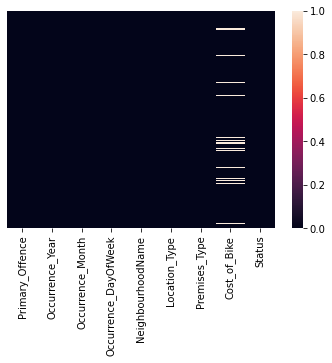

In [15]:
sns.heatmap(df.isnull(),yticklabels=False)

In [16]:
uni = df['Occurrence_Year'].unique()
print(sorted(uni))

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [17]:
uni = df['Primary_Offence'].unique()
print(sorted(uni))


['AGGRAVATED ASLT PEACE OFFICER', 'ARR/WARR EXECUTED NO ADDED CHG', 'ASSAULT', 'ASSAULT - FORCE/THRT/IMPEDE', 'ASSAULT - RESIST/ PREVENT SEIZ', 'ASSAULT BODILY HARM', 'ASSAULT WITH WEAPON', 'B&E', 'B&E OUT', "B&E W'INTENT", 'CARRYING CONCEALED WEAPON', 'DRUG - POSS METH (SCHD I)', 'DRUG - TRAF CANNABIS (SCHD II)', 'DRUG - TRAF OTHER (SCHD I)', 'FIRE - DETERMINED', 'FRAUD - IDENTITY/PERS W-INT', 'FRAUD OVER', 'FRAUD UNDER', 'FTC PROBATION ORDER', 'FTC WITH CONDITIONS', 'INCIDENT', 'INFORMATION ONLY', 'INVALID GO - RMS ONLY', 'LIQUOR - INTOXICATED', 'MISCHIEF - ENDANGER LIFE', 'MISCHIEF - INTERFERE W-PROP', 'MISCHIEF TO VEHICLE', 'MISCHIEF UNDER', 'OTHER FEDERAL STATUTE OFFENCES', 'POSSESSION HOUSE BREAK INSTRUM', 'POSSESSION PROPERTY OBC OVER', 'POSSESSION PROPERTY OBC UNDER', 'PROPERTY - FOUND', 'PROPERTY - LOST', 'PROPERTY - RECOVERED', 'PUBLIC MISCHIEF', 'ROBBERY - BUSINESS', 'ROBBERY - HOME INVASION', 'ROBBERY - MUGGING', 'ROBBERY - OTHER', 'ROBBERY - SWARMING', 'ROBBERY WITH WEAPON

In [18]:
len(uni)

59

In [19]:
uni = df['Premises_Type'].unique()
print(sorted(uni))

['Apartment', 'Commercial', 'Educational', 'House', 'Other', 'Outside', 'Transit']


In [20]:
uni = df['Status'].unique()
print(sorted(uni))

['RECOVERED', 'STOLEN']


Text(0.5, 1.0, 'Histogram')

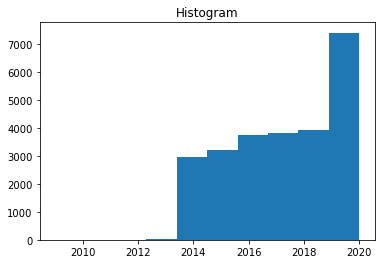

In [21]:
plt.hist(df["Occurrence_Year"])
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

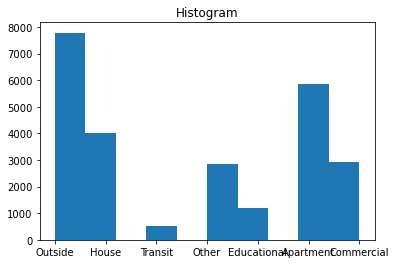

In [22]:
plt.hist(df["Premises_Type"])
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

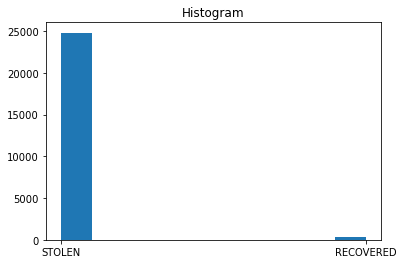

In [23]:
plt.hist(df["Status"])
plt.title("Histogram")

# Data Modelling


In [24]:
#Deal with Category Variables
cat_vars=['Occurrence_Month','Occurrence_DayOfWeek', 'NeighbourhoodName', 'Location_Type',
       'Premises_Type']
for var in cat_vars:
 cat_list='var'+'_'+var
 print(cat_list)
 cat_list= pd.get_dummies(df[var], prefix=var)
 df1=df.join(cat_list)
 df=df1
df.head(2)

var_Occurrence_Month
var_Occurrence_DayOfWeek
var_NeighbourhoodName
var_Location_Type
var_Premises_Type


,Primary_Offence,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,NeighbourhoodName,Location_Type,Premises_Type,Cost_of_Bike,Status,Occurrence_Month_April,...,Location_Type_Ttc Subway Train,Location_Type_Universities / Colleges,Location_Type_Unknown,Premises_Type_Apartment,Premises_Type_Commercial,Premises_Type_Educational,Premises_Type_House,Premises_Type_Other,Premises_Type_Outside,Premises_Type_Transit
0,THEFT UNDER,2017,October,Tuesday,Kingsway South (15),"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,700.0,STOLEN,0,...,0,0,0,0,0,0,0,0,1,0
1,THEFT UNDER - BICYCLE,2017,November,Wednesday,Kingsway South (15),"Single Home, House (Attach Garage, Cottage, Mo...",House,1100.0,RECOVERED,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
cat_vars=['Occurrence_Month','Occurrence_DayOfWeek', 'NeighbourhoodName', 'Location_Type', 'Premises_Type']
df_vars=df.columns.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]
df_final=df[to_keep]
df_final.columns.values

array(['Primary_Offence', 'Occurrence_Year', 'Cost_of_Bike', 'Status',
       'Occurrence_Month_April', 'Occurrence_Month_August',
       'Occurrence_Month_December', 'Occurrence_Month_February',
       'Occurrence_Month_January', 'Occurrence_Month_July',
       'Occurrence_Month_June', 'Occurrence_Month_March',
       'Occurrence_Month_May', 'Occurrence_Month_November',
       'Occurrence_Month_October', 'Occurrence_Month_September',
       'Occurrence_DayOfWeek_Friday', 'Occurrence_DayOfWeek_Monday',
       'Occurrence_DayOfWeek_Saturday', 'Occurrence_DayOfWeek_Sunday',
       'Occurrence_DayOfWeek_Thursday', 'Occurrence_DayOfWeek_Tuesday',
       'Occurrence_DayOfWeek_Wednesday',
       'NeighbourhoodName_Agincourt North (129)',
       'NeighbourhoodName_Agincourt South-Malvern West (128)',
       'NeighbourhoodName_Alderwood (20)', 'NeighbourhoodName_Annex (95)',
       'NeighbourhoodName_Banbury-Don Mills (42)',
       'NeighbourhoodName_Bathurst Manor (34)',
       'Neighbourhood

In [26]:
types = pd.get_dummies( df["Status"] , drop_first=True)

In [27]:
types.head()

,STOLEN
0,1
1,0
2,1
3,1
4,1


In [28]:
df = df.drop("Status", axis=1)

In [29]:
df.head()

,Primary_Offence,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,NeighbourhoodName,Location_Type,Premises_Type,Cost_of_Bike,Occurrence_Month_April,Occurrence_Month_August,...,Location_Type_Ttc Subway Train,Location_Type_Universities / Colleges,Location_Type_Unknown,Premises_Type_Apartment,Premises_Type_Commercial,Premises_Type_Educational,Premises_Type_House,Premises_Type_Other,Premises_Type_Outside,Premises_Type_Transit
0,THEFT UNDER,2017,October,Tuesday,Kingsway South (15),"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,700.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,THEFT UNDER - BICYCLE,2017,November,Wednesday,Kingsway South (15),"Single Home, House (Attach Garage, Cottage, Mo...",House,1100.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,THEFT UNDER - BICYCLE,2018,September,Friday,Kingsway South (15),Ttc Subway Station,Transit,904.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,THEFT UNDER,2015,May,Thursday,Kingsway South (15),Ttc Subway Station,Transit,400.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,THEFT UNDER,2015,May,Saturday,Kingsway South (15),Ttc Subway Station,Transit,600.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
df= df.drop("Primary_Offence", axis=1)
df= df.drop("Occurrence_Month", axis=1)
df= df.drop("Occurrence_DayOfWeek", axis=1)
df= df.drop("NeighbourhoodName", axis=1)
df= df.drop("Location_Type", axis=1)
df= df.drop("Premises_Type", axis=1)

In [31]:
df.head()

,Occurrence_Year,Cost_of_Bike,Occurrence_Month_April,Occurrence_Month_August,Occurrence_Month_December,Occurrence_Month_February,Occurrence_Month_January,Occurrence_Month_July,Occurrence_Month_June,Occurrence_Month_March,...,Location_Type_Ttc Subway Train,Location_Type_Universities / Colleges,Location_Type_Unknown,Premises_Type_Apartment,Premises_Type_Commercial,Premises_Type_Educational,Premises_Type_House,Premises_Type_Other,Premises_Type_Outside,Premises_Type_Transit
0,2017,700.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2017,1100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2018,904.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2015,400.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2015,600.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
finalData = pd.concat([df, types], axis=1)

In [33]:
finalData.head()

,Occurrence_Year,Cost_of_Bike,Occurrence_Month_April,Occurrence_Month_August,Occurrence_Month_December,Occurrence_Month_February,Occurrence_Month_January,Occurrence_Month_July,Occurrence_Month_June,Occurrence_Month_March,...,Location_Type_Universities / Colleges,Location_Type_Unknown,Premises_Type_Apartment,Premises_Type_Commercial,Premises_Type_Educational,Premises_Type_House,Premises_Type_Other,Premises_Type_Outside,Premises_Type_Transit,STOLEN
0,2017,700.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2017,1100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2018,904.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2015,400.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,2015,600.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [34]:
finalData.isnull().sum()

Occurrence_Year                 0
Cost_of_Bike                 1441
Occurrence_Month_April          0
Occurrence_Month_August         0
Occurrence_Month_December       0
                             ... 
Premises_Type_House             0
Premises_Type_Other             0
Premises_Type_Outside           0
Premises_Type_Transit           0
STOLEN                          0
Length: 212, dtype: int64

In [35]:
finalData=finalData.fillna(df.mean())

In [36]:
finalData.isnull().sum()

Occurrence_Year              0
Cost_of_Bike                 0
Occurrence_Month_April       0
Occurrence_Month_August      0
Occurrence_Month_December    0
                            ..
Premises_Type_House          0
Premises_Type_Other          0
Premises_Type_Outside        0
Premises_Type_Transit        0
STOLEN                       0
Length: 212, dtype: int64

In [37]:
finalData.describe()

,Occurrence_Year,Cost_of_Bike,Occurrence_Month_April,Occurrence_Month_August,Occurrence_Month_December,Occurrence_Month_February,Occurrence_Month_January,Occurrence_Month_July,Occurrence_Month_June,Occurrence_Month_March,...,Location_Type_Universities / Colleges,Location_Type_Unknown,Premises_Type_Apartment,Premises_Type_Commercial,Premises_Type_Educational,Premises_Type_House,Premises_Type_Other,Premises_Type_Outside,Premises_Type_Transit,STOLEN
count,25115.000000,25115.000000,25115.000000,25115.000000,25115.000000,25115.000000,25115.000000,25115.000000,25115.000000,25115.000000,...,25115.000000,25115.000000,25115.000000,25115.000000,25115.000000,25115.000000,25115.000000,25115.000000,25115.000000,25115.000000
mean,2017.128210,949.694433,0.060761,0.144416,0.031933,0.022138,0.024607,0.157277,0.138642,0.034402,...,0.026438,0.004181,0.232491,0.116265,0.047103,0.160024,0.113637,0.309855,0.020625,0.987736
std,1.959383,1628.827602,0.238895,0.351518,0.175826,0.147136,0.154927,0.364069,0.345580,0.182262,...,0.160438,0.064525,0.422428,0.320549,0.211864,0.366636,0.317377,0.462443,0.142129,0.110062
min,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2017.000000,675.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2019.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2020.000000,120000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
finalData.corr()

,Occurrence_Year,Cost_of_Bike,Occurrence_Month_April,Occurrence_Month_August,Occurrence_Month_December,Occurrence_Month_February,Occurrence_Month_January,Occurrence_Month_July,Occurrence_Month_June,Occurrence_Month_March,...,Location_Type_Universities / Colleges,Location_Type_Unknown,Premises_Type_Apartment,Premises_Type_Commercial,Premises_Type_Educational,Premises_Type_House,Premises_Type_Other,Premises_Type_Outside,Premises_Type_Transit,STOLEN
Occurrence_Year,1.000000,0.031951,-0.007966,0.019019,-0.024829,0.036700,0.027515,0.002934,-0.020725,0.033029,...,-0.055623,-0.014318,0.152374,-0.025763,-0.055602,-0.034713,0.003912,-0.074475,0.011237,0.015231
Cost_of_Bike,0.031951,1.000000,0.020839,-0.020853,0.033999,0.017626,0.025589,-0.017456,-0.004745,0.008539,...,-0.031291,-0.007273,0.017926,0.028106,-0.044284,0.003768,0.021682,-0.022907,-0.034260,-0.005867
Occurrence_Month_April,-0.007966,0.020839,1.000000,-0.104496,-0.046195,-0.038270,-0.040398,-0.109878,-0.102042,-0.048008,...,0.007953,0.001602,0.016264,-0.000219,0.001668,0.007185,-0.009143,-0.011115,-0.012283,-0.020120
Occurrence_Month_August,0.019019,-0.020853,-0.104496,1.000000,-0.074618,-0.061817,-0.065255,-0.177486,-0.164828,-0.077548,...,-0.018281,0.012001,-0.015082,0.013890,-0.037343,0.000492,0.011006,0.008612,0.015296,0.009757
Occurrence_Month_December,-0.024829,0.033999,-0.046195,-0.074618,1.000000,-0.027328,-0.028847,-0.078462,-0.072866,-0.034282,...,-0.012991,-0.011768,0.039426,-0.002999,-0.017933,0.008438,0.000616,-0.027181,-0.018390,0.003777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Premises_Type_House,-0.034713,0.003768,0.007185,0.000492,0.008438,-0.011052,-0.011843,0.011606,-0.014520,-0.010285,...,-0.071927,-0.028281,-0.240226,-0.158315,-0.097042,1.000000,-0.156284,-0.292461,-0.063341,-0.003663
Premises_Type_Other,0.003912,0.021682,-0.009143,0.011006,0.000616,0.004108,-0.001804,-0.000299,-0.016586,0.006069,...,-0.059005,0.180960,-0.197068,-0.129873,-0.079608,-0.156284,1.000000,-0.239918,-0.051961,-0.003419
Premises_Type_Outside,-0.074475,-0.022907,-0.011115,0.008612,-0.027181,-0.020060,-0.013611,0.024614,0.037894,-0.016400,...,-0.110419,-0.043416,-0.368782,-0.243037,-0.148974,-0.292461,-0.239918,1.000000,-0.097237,-0.016088
Premises_Type_Transit,0.011237,-0.034260,-0.012283,0.015296,-0.018390,-0.002794,-0.010391,0.018107,0.005013,-0.005872,...,-0.023914,-0.009403,-0.079870,-0.052637,-0.032265,-0.063341,-0.051961,-0.097237,1.000000,0.003443


In [39]:
finalData.columns.values

array(['Occurrence_Year', 'Cost_of_Bike', 'Occurrence_Month_April',
       'Occurrence_Month_August', 'Occurrence_Month_December',
       'Occurrence_Month_February', 'Occurrence_Month_January',
       'Occurrence_Month_July', 'Occurrence_Month_June',
       'Occurrence_Month_March', 'Occurrence_Month_May',
       'Occurrence_Month_November', 'Occurrence_Month_October',
       'Occurrence_Month_September', 'Occurrence_DayOfWeek_Friday',
       'Occurrence_DayOfWeek_Monday', 'Occurrence_DayOfWeek_Saturday',
       'Occurrence_DayOfWeek_Sunday', 'Occurrence_DayOfWeek_Thursday',
       'Occurrence_DayOfWeek_Tuesday', 'Occurrence_DayOfWeek_Wednesday',
       'NeighbourhoodName_Agincourt North (129)',
       'NeighbourhoodName_Agincourt South-Malvern West (128)',
       'NeighbourhoodName_Alderwood (20)', 'NeighbourhoodName_Annex (95)',
       'NeighbourhoodName_Banbury-Don Mills (42)',
       'NeighbourhoodName_Bathurst Manor (34)',
       'NeighbourhoodName_Bay Street Corridor (76)',
    

 # Prepare the data for the Model Building

In [49]:
from sklearn.utils import resample
# Separate majority and minority classes
finalData_majority = finalData[finalData.STOLEN==1]
finalData_minority = finalData[finalData.STOLEN==0]
 
# Downsample majority class
finalData_majority_downsampled = resample(finalData_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2000,     # to match minority class
                                 random_state=500) # reproducible results
# Upsample minority class
finalData_minority_upsampled = resample(finalData_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=500) # reproducible results
 
# Combine majority class with upsampled minority class
finalData_upsampled = pd.concat([finalData_majority, finalData_minority_upsampled])

# Combine minority class with downsampled majority class
finalData_downsampled = pd.concat([finalData_majority_downsampled, finalData_minority])
 
# Display new class counts
finalData_downsampled.STOLEN.value_counts()
finalData_upsampled.STOLEN.value_counts()

1    24807
0     1000
Name: STOLEN, dtype: int64

In [50]:
finalData = pd.concat([finalData_downsampled, finalData_upsampled])

In [51]:
finalData_vars = finalData.columns.values.tolist()
Y=['STOLEN']
X=[i for i in finalData_vars if i not in Y]
type(Y)
type(X)



list

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 20)
rfe = rfe.fit(finalData[X], finalData[Y])
print(rfe.support_)
print(rfe.ranking_)
cols=['Occurrence_Year', 'Cost_of_Bike', 'Occurrence_Month_December','Occurrence_Month_April','Occurrence_Month_August',
       'Occurrence_Month_February', 'Occurrence_Month_January','Occurrence_Month_July', 'Occurrence_Month_June',
       'Occurrence_Month_March','Occurrence_Month_May','Occurrence_Month_September','Occurrence_Month_October',
      'Occurrence_Month_November','Location_Type_Universities / Colleges', 'Location_Type_Unknown',
       'Premises_Type_Apartment', 'Premises_Type_Commercial','Premises_Type_Educational', 'Premises_Type_House',
       'Premises_Type_Other', 'Premises_Type_Outside', 'Premises_Type_Transit']
X=finalData[cols]
Y=finalData['STOLEN']
type(Y)
type(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[ True  True  True  True False False False  True False False False False
 False  True False  True  True False  True False  True False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False Fa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


pandas.core.frame.DataFrame

# Build Logistic Regression Model

In [53]:
# split data into 70%training, 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=0)

In [54]:
# Build the model and validate the parmeters
from sklearn import linear_model
from sklearn import metrics
clf1 = linear_model.LogisticRegression(solver='lbfgs')
clf1.fit(X_train, Y_train)

LogisticRegression()

In [55]:
# Run the test data against the new model
probs = clf1.predict_proba(X_test)
print(probs)
predicted=clf1.predict(X_test)
print(predicted)

[[0.02754349 0.97245651]
 [0.05990369 0.94009631]
 [0.04192844 0.95807156]
 ...
 [0.07701017 0.92298983]
 [0.04202863 0.95797137]
 [0.04158927 0.95841073]]
[1 1 1 ... 1 1 1]


In [56]:
#Check the model Accuracy
print(metrics.accuracy_score(Y_test, predicted))

0.9549496147006521


In [57]:
# times Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_model.LogisticRegression(solver='lbfgs'), X, Y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.95341394 0.95341394 0.95341394 0.95341394 0.95341394 0.95375311
 0.95375311 0.95339737 0.95339737 0.95304162]
0.9534412283991006


# Generating Confusion Matrix

In [58]:
prob=probs[:,1]
prob_df=pd.DataFrame(prob)
prob_df['predict']=np.where(prob_df[0]>=0.05,1,0)
import numpy as np
Y_A=Y_test.values
Y_P=np.array(prob_df['predict'])
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y_A, Y_P)
print(confusion_matrix)

[[   0  380]
 [   0 8055]]


# Decision Tree

In [59]:
# Separate the predictors from the target
colnames=finalData.columns.values.tolist()
predictors=colnames[:211]
target=colnames[211]
print(target)

STOLEN


In [60]:
#Split Dataset into train and test variables
import numpy as np
finalData['is_train']=np.random.uniform(0,1,len(finalData))<=.75
print(finalData.head(5))

       Occurrence_Year  Cost_of_Bike  Occurrence_Month_April  \
11549             2016         800.0                       0   
12277             2018         400.0                       0   
21974             2019         250.0                       0   
21515             2018         300.0                       0   
16171             2017         600.0                       0   

       Occurrence_Month_August  Occurrence_Month_December  \
11549                        0                          0   
12277                        0                          0   
21974                        0                          1   
21515                        0                          0   
16171                        0                          0   

       Occurrence_Month_February  Occurrence_Month_January  \
11549                          1                         0   
12277                          0                         0   
21974                          0                         0   


In [61]:
# Create two new dataframes: with the training rows and with the test rows
train,test = finalData[finalData['is_train']==True],finalData[finalData['is_train']==False]
print('Number of observations in the training data:',len(train))
print('Number of observations in the test data:', len(test))

Number of observations in the training data: 20966
Number of observations in the test data: 7149


# Build the Deicison Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',min_samples_split=20, random_state=99)
dt.fit(train[predictors],train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [63]:
# Test the model
preds=dt.predict(test[predictors])
pd.crosstab(test['STOLEN'],preds,rownames=['Actual'],colnames=['Predictions'])

Predictions,0,1
Actual,,
0,225,118
1,126,6680


In [64]:
# Generate a dot file to visualize the tree using vizgraph
from sklearn.tree import export_graphviz
with open('dtree.dot','w') as dotfile:
    export_graphviz(dt,out_file=dotfile,feature_names=predictors)
    dotfile.close()

# Test again using 80% Training and 20% Testing

In [65]:
X=finalData[predictors]
Y=finalData[target]

from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(X,Y,test_size=0.2)

In [66]:
dt_new=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=20,random_state=99)
dt_new.fit(trainX,trainY)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [67]:
# Cross Validation
from sklearn.model_selection import KFold
crossvalidation = KFold(n_splits=10,shuffle=True,random_state=1)
from sklearn.model_selection import cross_val_score
score=np.mean(cross_val_score(dt_new,trainX,trainY,scoring='accuracy',cv=crossvalidation,n_jobs=1))
score

0.9574958154241392

# Test the model using the testing data

In [68]:
testY_predict = dt_new.predict(testX)
testY_predict.dtype

dtype('uint8')

In [69]:
# Accuracy Calculation
from sklearn import metrics
labels = Y.unique()
print(labels)
print("Accuracy:",metrics.accuracy_score(testY,testY_predict))

[1 0]
Accuracy: 0.9564289525164503


In [70]:
# Print Confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion matrix\n", confusion_matrix(testY,testY_predict, labels))

Confusion matrix
 [[5317   44]
 [ 201   61]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


# Print Confusion matrix using seaborn heatmap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


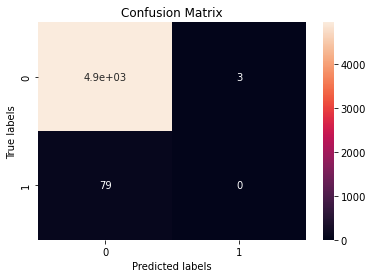

In [67]:
cm=confusion_matrix(testY,testY_predict,labels)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0','1']);
ax.yaxis.set_ticklabels(['0','1']);
plt.show()

# Feature importance test

Feature: 0, Score: 0.01709


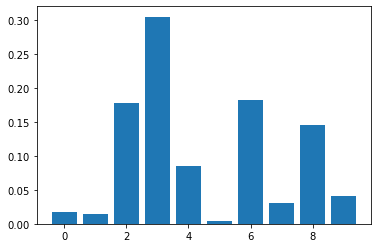

Feature: 1, Score: 0.01379


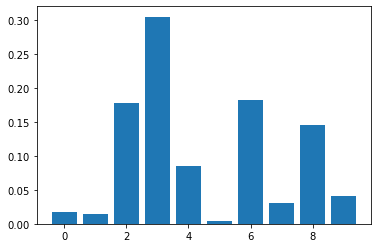

Feature: 2, Score: 0.17794


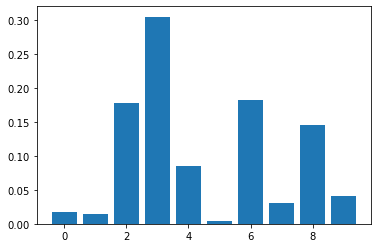

Feature: 3, Score: 0.30436


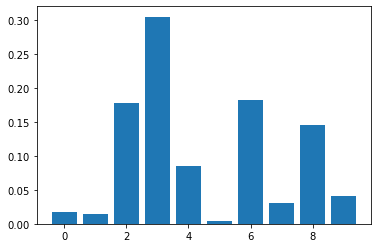

Feature: 4, Score: 0.08474


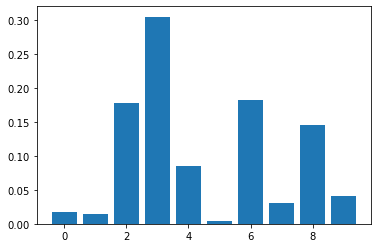

Feature: 5, Score: 0.00400


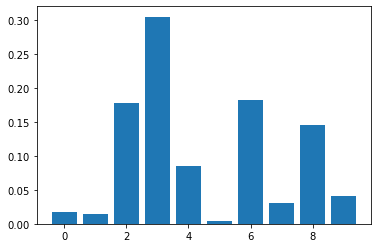

Feature: 6, Score: 0.18123


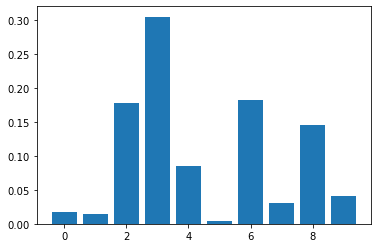

Feature: 7, Score: 0.03075


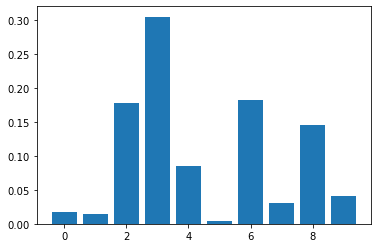

Feature: 8, Score: 0.14453


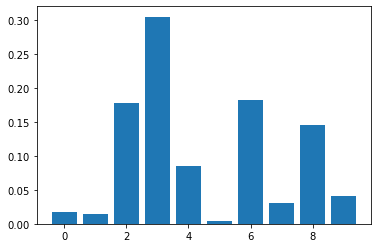

Feature: 9, Score: 0.04156


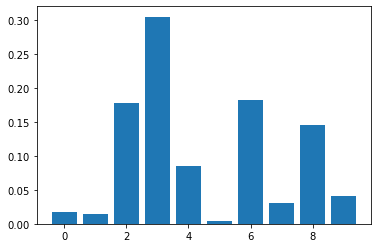

In [4]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
X, y=make_classification(n_samples=1000,n_features=10,n_informative=5,n_redundant=5,random_state=1)
# Deifne the model
model=DecisionTreeClassifier()
#fit the model
model.fit(X,y)
#get importance
importance=model.feature_importances_
#Summarize Feature Importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'%(i,v))
    #plot feature importance
    pyplot.bar([x for x in range(len(importance))],importance)
    pyplot.show()

In [69]:
# Features, 2,3,6,8 are important to the prediction

## API

In [72]:
import joblib 
joblib.dump(dt_new, 'model_lr2.pkl')
print("Model dumped!")

Model dumped!


In [73]:
model_columns = list(trainX.columns)
print(model_columns)
joblib.dump(model_columns, 'model_columns.pkl')
print("Model columns dumped!")

['Occurrence_Year', 'Cost_of_Bike', 'Occurrence_Month_April', 'Occurrence_Month_August', 'Occurrence_Month_December', 'Occurrence_Month_February', 'Occurrence_Month_January', 'Occurrence_Month_July', 'Occurrence_Month_June', 'Occurrence_Month_March', 'Occurrence_Month_May', 'Occurrence_Month_November', 'Occurrence_Month_October', 'Occurrence_Month_September', 'Occurrence_DayOfWeek_Friday', 'Occurrence_DayOfWeek_Monday', 'Occurrence_DayOfWeek_Saturday', 'Occurrence_DayOfWeek_Sunday', 'Occurrence_DayOfWeek_Thursday', 'Occurrence_DayOfWeek_Tuesday', 'Occurrence_DayOfWeek_Wednesday', 'NeighbourhoodName_Agincourt North (129)', 'NeighbourhoodName_Agincourt South-Malvern West (128)', 'NeighbourhoodName_Alderwood (20)', 'NeighbourhoodName_Annex (95)', 'NeighbourhoodName_Banbury-Don Mills (42)', 'NeighbourhoodName_Bathurst Manor (34)', 'NeighbourhoodName_Bay Street Corridor (76)', 'NeighbourhoodName_Bayview Village (52)', 'NeighbourhoodName_Bayview Woods-Steeles (49)', 'NeighbourhoodName_Bedfor

In [74]:
from flask import Flask, request, jsonify
import traceback
import pandas as pd
import joblib
import sys
# Your API definition
app = Flask(__name__)
@app.route("/predict", methods=['GET','POST']) #use decorator pattern for the route
def predict():
    if lr:
        try:
            json_ = request.json
            print(json_)
            query = pd.get_dummies(pd.DataFrame(json_))
            query = query.reindex(columns=model_columns, fill_value=0)
            print(query)
            from sklearn import preprocessing
            scaler = preprocessing.StandardScaler()
            # Fit your data on the scaler object
            scaled_df = scaler.fit_transform(query)
            # return to data frame
            query = pd.DataFrame(scaled_df, columns=model_columns)
            print(query)
            prediction = list(lr.predict(query))
            print({'prediction': str(prediction)})
            return jsonify({'prediction': str(prediction)})
            return "Welcome to Bicycle Thefts model APIs!"

        except:

            return jsonify({'trace': traceback.format_exc()})
    else:
        print ('Train the model first')
        return ('No model here to use')

if __name__ == '__main__':
    try:
        port = int(sys.argv[1]) # This is for a command-line input
    except:
        port = 12345 # If you don't provide any port the port will be set to 12345

    lr = joblib.load(r"C:\Negin-Centennial-apps\Data Warehouse-309\Project2\model_G3.pkl")
    print ('Model loaded')
    model_columns = joblib.load(r"C:\Negin-Centennial-apps\Data Warehouse-309\Project2\model_columns.pkl") # Load "model_columns.pkl"
    print ('Model columns loaded')
    app.run(port=port, debug=True)

Model loaded
Model columns loaded
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
